In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Load the dataset

In [3]:
df = pd.read_csv('salary.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
# 16 rows and 4 columns
df.shape
# Detail info about the dataset
df.info()

(16, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [5]:
df.describe(include='all')

,company,job,degree,salary_more_then_100k
count,16,16,16,16.000
unique,3,3,2,NaN
top,facebook,business manager,masters,NaN
freq,6,6,8,NaN
mean,NaN,NaN,NaN,0.625
std,NaN,NaN,NaN,0.500
min,NaN,NaN,NaN,0.000
25%,NaN,NaN,NaN,0.000
50%,NaN,NaN,NaN,1.000
75%,NaN,NaN,NaN,1.000


In [6]:
# check if dataset is null
df.isnull().values.any()

False

#### Quick visualize at the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff41caecf50>,
      dtype=object)

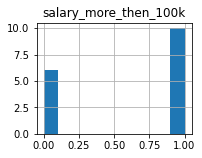

In [7]:
df.hist(figsize=(10,10), stacked=False,  layout=(4,3))

#### True false ratio 

In [8]:
true = len(df.loc[df['salary_more_then_100k'] == True])
false = len(df.loc[df['salary_more_then_100k'] == False])
print("Number of candidate who can get job: {0} ({1:2.2f}%)".format(true, (true / (true + false)) * 100 ))
print("Number of candidate who cannot get job: {0} ({1:2.2f}%)".format(false, (false / (true + false)) * 100 ))

Number of candidate who can get job: 10 (62.50%)
Number of candidate who cannot get job: 6 (37.50%)


In [9]:
# randomize out whole dataset
df = df.sample(frac=1)
df

,company,job,degree,salary_more_then_100k
4,google,computer programmer,bachelors,0
13,facebook,business manager,masters,1
12,facebook,business manager,bachelors,1
2,google,business manager,bachelors,1
8,abc pharma,business manager,bachelors,0
11,facebook,sales executive,masters,1
9,abc pharma,business manager,masters,1
15,facebook,computer programmer,masters,1
5,google,computer programmer,masters,1
1,google,sales executive,masters,0


### preprocessing data

In [10]:
inputs = df.drop("salary_more_then_100k", axis=1)
output = df["salary_more_then_100k"]

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [13]:
inputs["company_n"] = le_company.fit_transform(inputs["company"])
inputs["job_n"] = le_job.fit_transform(inputs["job"])
inputs["degree_n"] = le_degree.fit_transform(inputs["degree"])

In [14]:
inputs

,company,job,degree,company_n,job_n,degree_n
4,google,computer programmer,bachelors,2,1,0
13,facebook,business manager,masters,1,0,1
12,facebook,business manager,bachelors,1,0,0
2,google,business manager,bachelors,2,0,0
8,abc pharma,business manager,bachelors,0,0,0
11,facebook,sales executive,masters,1,2,1
9,abc pharma,business manager,masters,0,0,1
15,facebook,computer programmer,masters,1,1,1
5,google,computer programmer,masters,2,1,1
1,google,sales executive,masters,2,2,1


In [15]:
inputs_n = inputs.drop(["company", "job","degree"], axis=1)
inputs_n

,company_n,job_n,degree_n
4,2,1,0
13,1,0,1
12,1,0,0
2,2,0,0
8,0,0,0
11,1,2,1
9,0,0,1
15,1,1,1
5,2,1,1
1,2,2,1


In [20]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [21]:
# As we have less amount of data , we have to manually test it.

In [24]:
model.fit(inputs_n, output)
model.score(inputs_n, output)

DecisionTreeClassifier()

1.0

In [26]:
# manual testing 
model.predict([[1,0,0]])

array([1])

In [ ]:
model.pre